In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
28*28

784

In [12]:
img1=df.iloc[0,1:].values.reshape(28,28)

In [13]:
from matplotlib import pyplot as plt

In [ ]:
plt.imshow(img1)
plt.show()

In [15]:
x=df.iloc[:,1:]
y=df.label

In [17]:
#scale data
x=x/255

In [22]:
y=pd.get_dummies(y)

In [23]:
# split data
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras.metrics import Precision, Recall

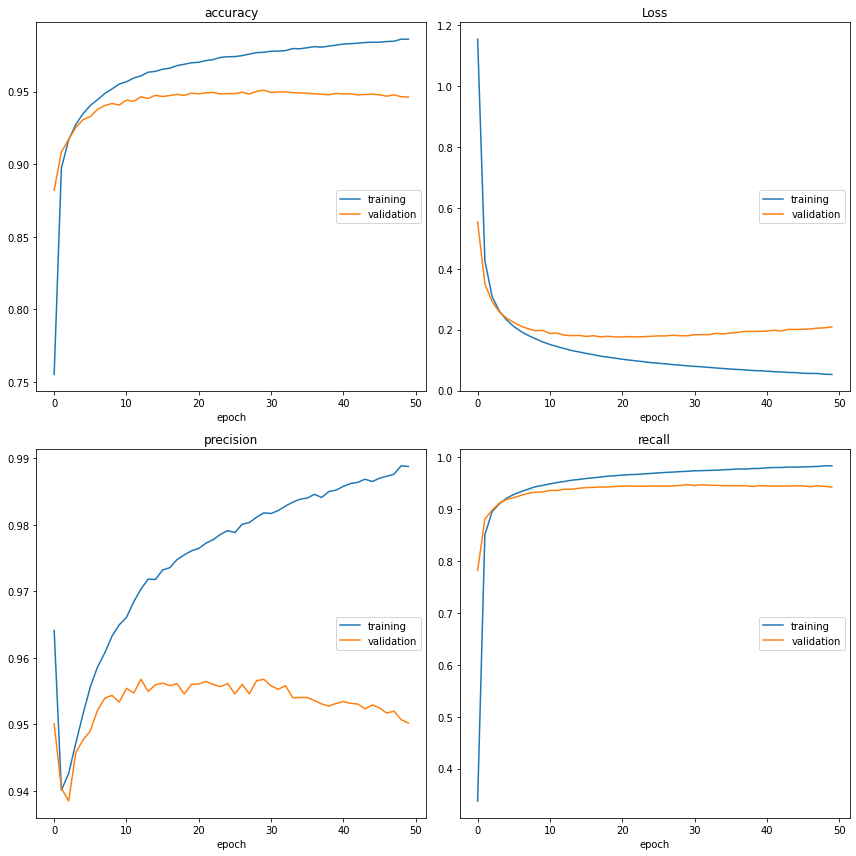

accuracy
	training         	 (min:    0.755, max:    0.986, cur:    0.986)
	validation       	 (min:    0.882, max:    0.951, cur:    0.946)
Loss
	training         	 (min:    0.053, max:    1.155, cur:    0.053)
	validation       	 (min:    0.176, max:    0.554, cur:    0.209)
precision
	training         	 (min:    0.940, max:    0.989, cur:    0.989)
	validation       	 (min:    0.938, max:    0.957, cur:    0.950)
recall
	training         	 (min:    0.337, max:    0.984, cur:    0.984)
	validation       	 (min:    0.782, max:    0.947, cur:    0.943)
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9861 - precision: 0.9888 - recall: 0.9837 - val_loss: 0.2093 - val_accuracy: 0.9462 - val_precision: 0.9502 - val_recall: 0.9427


In [30]:
model=Sequential()
#hidden layer
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
#output layer
model.add(Dense(10,activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[PlotLossesKeras()])

In [31]:
model.predict(x_train)

array([[4.7151816e-09, 1.6633163e-07, 1.1960407e-07, ..., 3.4366792e-08,
        1.0793992e-06, 4.6396806e-09],
       [2.3214938e-10, 9.9878711e-01, 6.4880092e-05, ..., 9.4820716e-04,
        5.3621341e-05, 6.2692510e-05],
       [5.0869511e-07, 4.6377041e-04, 3.1795341e-07, ..., 6.4138958e-04,
        9.3295183e-10, 3.1100758e-04],
       ...,
       [1.1967993e-06, 6.0393990e-07, 1.0752203e-04, ..., 9.9977273e-01,
        1.1060811e-09, 6.7128472e-05],
       [3.2053560e-10, 9.9969387e-01, 2.5489577e-05, ..., 6.9759328e-05,
        1.1240491e-04, 4.7869547e-05],
       [2.5930948e-04, 1.5052694e-07, 4.1657619e-05, ..., 3.4902457e-06,
        4.7552181e-05, 5.8698610e-05]], dtype=float32)

In [32]:
pd.DataFrame(model.predict(x_train),columns=y_train.columns)

,0,1,2,3,4,5,6,7,8,9
0,4.715182e-09,1.663316e-07,1.196041e-07,0.999990,1.350275e-09,8.923509e-06,1.384837e-13,3.436679e-08,1.079399e-06,4.639681e-09
1,2.321494e-10,9.987871e-01,6.488009e-05,0.000043,3.539412e-05,4.632363e-06,4.733008e-08,9.482072e-04,5.362134e-05,6.269251e-05
2,5.086951e-07,4.637704e-04,3.179534e-07,0.001982,9.965991e-01,1.491595e-06,1.709301e-08,6.413896e-04,9.329518e-10,3.110076e-04
3,1.307717e-07,2.977613e-04,1.541641e-04,0.000027,9.177210e-01,1.376067e-05,4.905411e-06,6.597202e-04,6.672007e-06,8.111459e-02
4,2.025264e-08,1.278336e-03,3.544895e-05,0.000427,9.949247e-01,1.247719e-06,6.899482e-08,1.955735e-04,6.569600e-05,3.072092e-03
...,...,...,...,...,...,...,...,...,...,...
44995,5.514734e-06,3.148737e-08,2.282902e-06,0.000022,4.855679e-08,2.801928e-05,8.853350e-08,9.824919e-08,9.998899e-01,5.196891e-05
44996,2.342520e-12,9.993012e-01,4.643657e-06,0.000452,4.034143e-05,2.322362e-05,5.915039e-06,1.973244e-08,1.626032e-04,1.004601e-05
44997,1.196799e-06,6.039399e-07,1.075220e-04,0.000051,9.921819e-08,7.077374e-08,2.237600e-12,9.997727e-01,1.106081e-09,6.712847e-05
44998,3.205356e-10,9.996939e-01,2.548958e-05,0.000040,4.101454e-06,6.536545e-06,1.037184e-07,6.975933e-05,1.124049e-04,4.786955e-05


In [37]:
import numpy as np

In [39]:
y_train_pred=np.argmax(model.predict(x_train),axis=1)

In [43]:
y_train_actual=np.argmax(y_train.values,axis=1)

In [44]:
pd.crosstab(y_train_actual,y_train_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,4396,0,2,0,6,0,0,1,5,3
1,1,4975,3,5,6,3,0,4,12,5
2,8,1,4442,11,9,4,3,8,12,2
3,3,2,16,4471,0,35,0,10,34,12
4,3,4,3,0,4370,1,6,0,2,19
5,6,0,1,17,3,4036,2,0,6,8
6,15,4,5,0,7,9,4398,0,12,0
7,5,7,18,5,10,0,0,4668,3,14
8,14,2,3,18,0,7,1,0,4315,7


In [47]:
np.trace(pd.crosstab(y_train_actual,y_train_pred))/x_train.shape[0]

0.9876444444444444

In [49]:
z=np.array([[2,6,10,20],[100,20,40,60]])

In [50]:
z

array([[  2,   6,  10,  20],
       [100,  20,  40,  60]])

In [51]:
np.argmax(z,axis=1)

array([3, 0])

In [55]:
pd.DataFrame(model.predict(x_train))

,0,1,2,3,4,5,6,7,8,9
0,4.715182e-09,1.663316e-07,1.196041e-07,0.999990,1.350275e-09,8.923509e-06,1.384837e-13,3.436679e-08,1.079399e-06,4.639681e-09
1,2.321494e-10,9.987871e-01,6.488009e-05,0.000043,3.539412e-05,4.632363e-06,4.733008e-08,9.482072e-04,5.362134e-05,6.269251e-05
2,5.086951e-07,4.637704e-04,3.179534e-07,0.001982,9.965991e-01,1.491595e-06,1.709301e-08,6.413896e-04,9.329518e-10,3.110076e-04
3,1.307717e-07,2.977613e-04,1.541641e-04,0.000027,9.177210e-01,1.376067e-05,4.905411e-06,6.597202e-04,6.672007e-06,8.111459e-02
4,2.025264e-08,1.278336e-03,3.544895e-05,0.000427,9.949247e-01,1.247719e-06,6.899482e-08,1.955735e-04,6.569600e-05,3.072092e-03
...,...,...,...,...,...,...,...,...,...,...
44995,5.514734e-06,3.148737e-08,2.282902e-06,0.000022,4.855679e-08,2.801928e-05,8.853350e-08,9.824919e-08,9.998899e-01,5.196891e-05
44996,2.342520e-12,9.993012e-01,4.643657e-06,0.000452,4.034143e-05,2.322362e-05,5.915039e-06,1.973244e-08,1.626032e-04,1.004601e-05
44997,1.196799e-06,6.039399e-07,1.075220e-04,0.000051,9.921819e-08,7.077374e-08,2.237600e-12,9.997727e-01,1.106081e-09,6.712847e-05
44998,3.205356e-10,9.996939e-01,2.548958e-05,0.000040,4.101454e-06,6.536545e-06,1.037184e-07,6.975933e-05,1.124049e-04,4.786955e-05
